ALGORITMO DE REGRESIÓN

In [ ]:
import keras
import tensorflow as tf
from keras import models
from keras import layers
keras.__version__





'2.9.0'

Algoritmo para predecir la duración de la batería de un teléfono móvil

Vamos a predecir la duración de la batería de un teléfono movil dados algunos datos como los píxeles de la cámara, si tiene o no conexión wifi, la cantidad de cores del procesador, etc.

El conjunto de datos tiene un total de 1000 datos, que dividiremos entre 1750 ded entrenamiento (de los cuales 500 serán para validación) y 250 de test. Las 21 carácaterísticas en los datos de entrada. Por ejemplo, algunos valores son proporciones, que toman valores entre 0 y 1, otros toman valores entre 1 y 12, otros entre 0 y 100 ...

In [ ]:
import pandas as pd
datos=pd.read_csv('train.csv.xls',encoding='latin-1')


Compruebo que los datos se han importado correctamente. Deben haber 2000 datos con 21 características.

In [ ]:
datos.shape

(2000, 21)

In [ ]:
test_datos

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,three_g,touch_screen,wifi,price_range
1750,0.218106,1.029303,-1.248304,0.981026,1.288674,0.953346,-0.619268,-0.001787,-1.724553,-0.220506,0.178391,0.414778,0.436213,-1.161790,-1.034857,-0.639792,0.556718,0.994583,-1.017593,-1.361591
1751,-1.678507,1.029303,-0.272971,-1.018758,-0.766754,-1.048337,0.983114,0.692697,-1.667990,0.213802,-0.150556,-1.227046,-0.135923,0.038832,0.389378,-0.411472,-1.795214,-1.004872,0.982149,-0.462602
1752,1.585220,1.029303,-1.248304,0.981026,0.146770,-1.048337,0.651586,-0.001787,-0.565014,-1.089122,-0.150556,1.461412,1.585136,1.252305,1.338867,0.958448,-1.795214,0.994583,-1.017593,1.335377
1753,-0.567014,-0.970976,-0.272971,0.981026,-0.766754,-1.048337,-1.227068,-1.390755,-1.045798,-0.220506,-1.137396,-0.876671,1.478151,-1.398610,-0.322740,-0.639792,0.556718,-1.004872,0.982149,-1.361591
1754,-0.359322,1.029303,0.214696,0.981026,-0.995135,0.953346,0.596332,-1.043513,-0.847828,0.648110,-1.466343,-1.330362,-0.240582,1.057709,-0.322740,-0.183152,0.556718,0.994583,-1.017593,0.436388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.025761,1.029303,-1.248304,0.981026,-0.995135,0.953346,-1.669104,1.039939,-0.989236,0.648110,0.671811,1.288470,1.480477,-1.344453,0.152005,-0.411472,0.556718,0.994583,-1.017593,-1.361591
1996,1.646842,1.029303,1.311946,0.981026,-0.995135,-1.048337,0.375314,-1.043513,1.301560,-0.220506,-1.137396,0.598949,1.654909,-0.092428,-0.322740,0.958448,0.556718,0.994583,0.982149,0.436388
1997,1.523597,-0.970976,-0.760637,0.981026,-0.766754,0.953346,0.209550,0.692697,-0.932673,1.516725,-1.137396,0.493387,0.880432,0.848426,-0.797485,-1.096432,0.556718,0.994583,-1.017593,1.335377
1998,0.612949,-0.970976,-0.760637,-1.018758,-0.081611,0.953346,0.762096,-1.390755,0.113740,0.213802,-0.808449,-0.701483,-1.356945,-1.159954,1.338867,0.958448,0.556718,0.994583,0.982149,-1.361591


Pequeña visualización de los datos

Las características de nuestro modelo son:



> ID

> Energía total que una batería puede almacenar en una sola medida

> Si tiene bluetooth

> Velocidad con la que el microprocesador ejecuta las instrucciones

> Tiene soporte dual SIM o no

> Megapíxeles de la cámara frontal

> Si tiene 4G

> Memoria interna medida en gigabytes

> Profundidad móvil en cm

> Peso móvil

> Número de núcleos del procesador

> Megapíxeles cámara principal

> Altura de resolución megapíxel

> Ancho de resolución megapíxel

> Memoria acceso aleatorio megabytes

> Altura pantalla en cm

> Anchura pantalla en cm

> **Tiempo más largo de la duración de batería**

> Tiene 3G

> Tiene pantalla táctil

> Tiene wifi







































Se han importado correctamente.

Separamos los datos en entrenamiento y test y sus correspondientes soluciones, que serán la **característica 17 (talk_time)** que según explicaba la página donde hemos tomado la base, es el tiempo que dura el móvil desde su última carga.

In [ ]:
labels=datos.talk_time
labels.shape

(2000,)

In [ ]:
datos=datos.drop(['talk_time'],axis=1)

In [ ]:
train_datos=datos[:1749]
test_datos=datos[1750:]

train_labels=labels[:1749]
test_labels=labels[1750:]

Una vez hemos separado los datos, vamos a normalizarlos.
Al tener 21 características tenemos datos con rangos muy distintos, en ese caso sería muy casi imposible que la red fuera capaz de entrenar bien con tanta variedad de datos, sabemos que podemos normalizarlos para que esta funcione muchísimo mejor.

La normalización de esto consta en: **Restar la media de las características** y **dividirla entre la desviación media de estas**.


In [ ]:

# Calculamos la media del primer eje de los datos de entrenamiento
mean = train_datos.mean(axis=0)
print("##### Media de las 21 características de los datos de entrenamiento ##### ")
print(mean)
# A los datos de entrenamiento le restamos la media
train_datos -= mean

# Calculamos la desviación estandar del primer eje de los datos de entrenamiento
std = train_datos.std(axis=0)
print("##### Desviación estandar de las 21 características de los datos de entrenamiento ##### ")
print(std)
# A los datos de entrenamiento los dividimos por la desviación estándar
train_datos /= std

test_datos -= mean
test_datos /= std

##### Media de las 21 características de los datos de entrenamiento ##### 
battery_power    1243.436821
blue                0.485420
clock_speed         1.523899
dual_sim            0.509434
fc                  4.357347
four_g              0.523728
int_memory         32.207547
m_dep               0.500515
mobile_wt         140.978273
n_cores             4.507719
pc                  9.915380
px_height         648.325901
px_width         1253.442539
ram              2132.694683
sc_h               12.359634
sc_w                5.802173
three_g             0.763293
touch_screen        0.502573
wifi                0.508862
price_range         1.514580
dtype: float64
##### Desviación estandar de las 21 características de los datos de entrenamiento ##### 
battery_power     438.149513
blue                0.499930
clock_speed         0.820232
dual_sim            0.500054
fc                  4.378650
four_g              0.499580
int_memory         18.098062
m_dep               0.287984
mobile_wt

Es muy IMPORTANTE no hacer la media de los datos de test ya que la red no puede saber nada de ellos hasta el primer momento de la validación.

##CREAMOS LA RED

A los datos de entrenamiento tenemos que partirlos junto a la validación. 

In [ ]:
partial_train_datos = train_datos[:1499]
partial_eval_train_datos = train_datos[1500:]
partial_train_labels = train_labels[:1499]
partial_eval_train_labels= train_labels[1500:]

Con estos datos, computamos el problema con las primeras 3/4 partes de los datos de entrenamiento para entrenar y el último 1/4 de los datos para validación.

Como tenemos una base de datos tan pequeña, vamos a crear una base de datos muy pequeña con únicamente dos capas ocultas. En general, cuantos menos datos de entrenamiento tengamos, peor será el sobreajuste y el uso una red pequeña es una forma de reducir el sobreajuste.

In [ ]:
def build_model():

    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model

In [ ]:
mymodel = build_model()



In [ ]:

history = mymodel.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=40, batch_size=1)

Epoch 1/40
1499/1499 [==============================] - 2s 1ms/step - loss: 36.4096 - mean_absolute_error: 5.1142 - val_loss: 35.8120 - val_mean_absolute_error: 5.1880
Epoch 2/40
1499/1499 [==============================] - 2s 1ms/step - loss: 30.6572 - mean_absolute_error: 4.7303 - val_loss: 36.4061 - val_mean_absolute_error: 5.2086
Epoch 3/40
1499/1499 [==============================] - 2s 1ms/step - loss: 29.9524 - mean_absolute_error: 4.6669 - val_loss: 35.9085 - val_mean_absolute_error: 5.1671
Epoch 4/40
1499/1499 [==============================] - 2s 1ms/step - loss: 28.9336 - mean_absolute_error: 4.5659 - val_loss: 35.9039 - val_mean_absolute_error: 5.1190
Epoch 5/40
1499/1499 [==============================] - 2s 1ms/step - loss: 28.3665 - mean_absolute_error: 4.5143 - val_loss: 36.6407 - val_mean_absolute_error: 5.2262
Epoch 6/40
1499/1499 [==============================] - 2s 1ms/step - loss: 27.9823 - mean_absolute_error: 4.4877 - val_loss: 35.9403 - val_mean_absolute_error:

 Nuestra primera red de entrenamiento se basa en 40 épocas, con una función de activación 'relu', que sabemos que es buena para casi todos los tipos de problemas. En las capas ponemos 64 neuronas.

Podemos observar que tanto para los datos de validación como para los de entrenamiento nuestra red no funciona bien. 

In [ ]:

mae_history = history.history['val_mean_absolute_error']

In [ ]:
mse_history = history.history['val_loss']

Confrontamos en una gráfica las épocas frente a la pérdida pérdida (MSE)

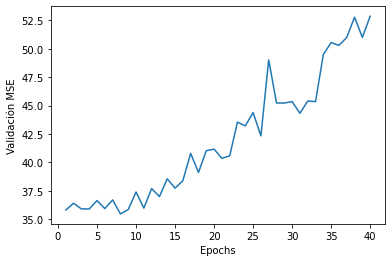

In [ ]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(mse_history) + 1), mse_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MSE')
plt.show()

No es un buen entrenamiento ya que el error no para de subir (aunque tenga picos).

Realizamos la gráfica de entreno y validación

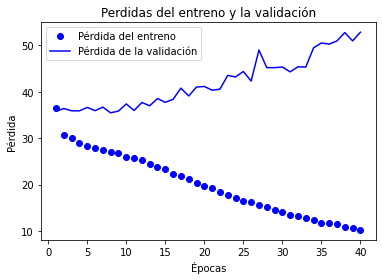

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Confrontamos en una gráfica las épocas contra la métrica de error absoluto medio (MAE)

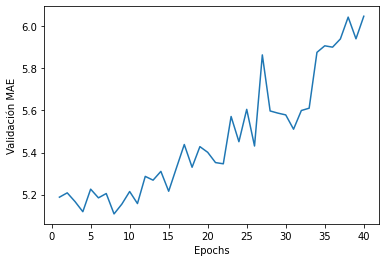

In [ ]:
 import matplotlib.pyplot as plt

plt.plot(range(1, len(mae_history) + 1), mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validación MAE')
plt.show()

Realizamos la gráfica para comparar el mae de entreno y validación

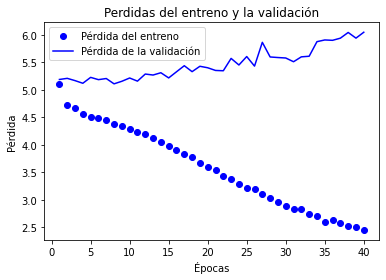

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['mean_absolute_error']
val_loss = history.history['val_mean_absolute_error']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Pérdida del entreno')
plt.plot(epochs, val_loss, 'b', label='Pérdida de la validación')
plt.title('Perdidas del entreno y la validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

Debemos solventar el hecho de que nuestro modelo no funcione, primero, reduciremos el número de épocas.

In [ ]:

history = mymodel.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=20, batch_size=1)

Epoch 1/20
1499/1499 [==============================] - 2s 2ms/step - loss: 10.2509 - mean_absolute_error: 2.4105 - val_loss: 54.1325 - val_mean_absolute_error: 6.0642
Epoch 2/20
1499/1499 [==============================] - 2s 1ms/step - loss: 9.9450 - mean_absolute_error: 2.3537 - val_loss: 54.2278 - val_mean_absolute_error: 6.1088
Epoch 3/20
1499/1499 [==============================] - 2s 1ms/step - loss: 9.3656 - mean_absolute_error: 2.2785 - val_loss: 55.7442 - val_mean_absolute_error: 6.2035
Epoch 4/20
1499/1499 [==============================] - 2s 1ms/step - loss: 9.2325 - mean_absolute_error: 2.2709 - val_loss: 56.1735 - val_mean_absolute_error: 6.2174
Epoch 5/20
1499/1499 [==============================] - 2s 1ms/step - loss: 8.7296 - mean_absolute_error: 2.2198 - val_loss: 56.2520 - val_mean_absolute_error: 6.2086
Epoch 6/20
1499/1499 [==============================] - 3s 2ms/step - loss: 8.6154 - mean_absolute_error: 2.2045 - val_loss: 56.5751 - val_mean_absolute_error: 6.29

En el primer modelo de entrenamiento ya podíamos haber observado que no es culpa del número de epocas que nuestro entrenamiento no acabe de predecir bien.



Vamos a probar por minimizar nuestra red.

In [ ]:
def build_model():

    model1 = models.Sequential()
    model1.add(layers.Dense(16, activation='relu',
                           input_shape=(train_datos.shape[1],)))
    model1.add(layers.Dense(16, activation='relu'))
    model1.add(layers.Dense(1))
    # MSE: Mean Squared Error
    # MAE: Mean Absolute Error
    model1.compile(optimizer='rmsprop', loss='mse', 
                  metrics=[tf.keras.metrics.MeanAbsoluteError()]) # metrics = ['mae']
    return model1

In [ ]:
mymodel1 = build_model()

In [ ]:

history1 = mymodel1.fit(partial_train_datos, partial_train_labels,
            validation_data=(partial_eval_train_datos, partial_eval_train_labels),
                        epochs=40, batch_size=1)

Epoch 1/40
1499/1499 [==============================] - 2s 1ms/step - loss: 55.2504 - mean_absolute_error: 6.0760 - val_loss: 35.5060 - val_mean_absolute_error: 5.1436
Epoch 2/40
1499/1499 [==============================] - 2s 1ms/step - loss: 31.7881 - mean_absolute_error: 4.7999 - val_loss: 34.1091 - val_mean_absolute_error: 5.0738
Epoch 3/40
1499/1499 [==============================] - 2s 1ms/step - loss: 30.3683 - mean_absolute_error: 4.6900 - val_loss: 34.5627 - val_mean_absolute_error: 5.1037
Epoch 4/40
1499/1499 [==============================] - 2s 1ms/step - loss: 29.7241 - mean_absolute_error: 4.6331 - val_loss: 34.0418 - val_mean_absolute_error: 5.0620
Epoch 5/40
1499/1499 [==============================] - 2s 1ms/step - loss: 29.3202 - mean_absolute_error: 4.6011 - val_loss: 34.3030 - val_mean_absolute_error: 5.0998
Epoch 6/40
1499/1499 [==============================] - 2s 1ms/step - loss: 28.7947 - mean_absolute_error: 4.5612 - val_loss: 34.4677 - val_mean_absolute_error:

Apenas hemos reducido el error, así que podemos decir que tampoco es culpa de la cantidad de neuronas de nuestras capas. 

Podemos intentar validar los datos de diferente manera. Hemos estudiado la validación de k-iteraciones, y sabemos que puede servir para datasets pequeños, como es en nuestro caso.

In [ ]:
import numpy as np

# k= 4 particiones
k = 4
num_val_samples = len(train_datos) // k 
print("num_val_samples", num_val_samples)
num_epochs = 15
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Preparamos la validación de los datos: datos de la partición #k
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]

    # Preparamos los datos de entrenamiento: Datos de las demás particiones
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_datos),"]")
    partial_train_data = np.concatenate(
        [train_datos[:i * num_val_samples],
         train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)

    # Construcción del modelo Keras (ya compilado)
    model = build_model()
    # Entrenando el modelo (en modo silencioso, verbose=0)
    model.fit(partial_train_datos, partial_train_labels,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evalua el modelo sobre los datos de validación
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

num_val_samples 437
processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 437 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 437 : 1749 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 437 : 874 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 437 ]U[ 874 : 1749 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 874 : 1311 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 874 ]U[ 1311 : 1749 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 1311 : 1748 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 1311 ]U[ 1748 : 1749 ]


Ahora mostramos los valores de error medio absoluto de validación obtenidos en cada una de las iteraciones

In [ ]:
all_scores

[4.298025131225586, 4.744709491729736, 4.72075891494751, 4.726546764373779]

Y realizamos la media para ver el error medio final


In [ ]:
np.mean(all_scores)

4.622510075569153

Volvemos a realizar el algoritmo de validación de k-iteraciones con más épocas para ver si encontramos en número de épocas que necesitamos para validar nuestro entrenamiento.

In [ ]:
num_epochs = 30
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    print("Uso para validar el siguiente rango de datos de entrenamiento -> [",(i * num_val_samples),":",((i + 1) * num_val_samples),"]")
    val_data = train_datos[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    print("Uso para entrenar el siguiente rango de datos de entrenamiento -> [0:",(i * num_val_samples),"]U[",(i + 1) * num_val_samples,":",len(train_datos),"]")
    partial_train_dat = np.concatenate(
        [train_datos[:i * num_val_samples],
         train_datos[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=128, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
Uso para validar el siguiente rango de datos de entrenamiento -> [ 0 : 437 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 0 ]U[ 437 : 1749 ]
processing fold # 1
Uso para validar el siguiente rango de datos de entrenamiento -> [ 437 : 874 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 437 ]U[ 874 : 1749 ]
processing fold # 2
Uso para validar el siguiente rango de datos de entrenamiento -> [ 874 : 1311 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 874 ]U[ 1311 : 1749 ]
processing fold # 3
Uso para validar el siguiente rango de datos de entrenamiento -> [ 1311 : 1748 ]
Uso para entrenar el siguiente rango de datos de entrenamiento -> [0: 1311 ]U[ 1748 : 1749 ]


In [ ]:
np.mean(all_mae_histories)

6.55630608399709

Nuestro sistema es mejor cuando tenemos menos épocas de entrenamiento.

##CONCLUSIONES

Al fin y al cabo nos hemos dado cuenta que para un set de datos con tan pocos datos, es muy difícil minimizar el error. La primera regla para que un algoritmo funcione mejor es obtener más datos de entrenamiento, en este caso no ha sido posible, se ha intentado: quitar capas, bajar épocas, cambiar la validación.., pero observamos que solo hemos llegado a un error de 4.62, el error más bajo que se encuentra en esta red de entrenamiento. 

Por tanto podemos concluir que no es un buen método hacer una predicción de 'datos', en este caso de la duración de la bateria de los móviles cuando tenemos pocos datos. Para trabajos futuros se ha aprendido de este error, y necesitaremos buscar un set de datos más amplio, ya sea para la regresión (como en este caso), como para la clasificación. 

Una opción de trabajo futuro, es indagar en los métodos para reducir el error en este tipo de datasets, es decir, cuando tenemos muy pocos datos, estamos seguros de que hay una solución ante este problema. 